# Prática 02

![](../../data/imagem/banner-pos-2022.jpg)

-----------

**Objetivo:**

Praticar a manipulação de imagens no espaço de cores HSV (Hue, Saturation, Value) e analisar histogramas para extrair informações visuais relevantes.

**Instruções:**

Complete o código abaixo realizando as tarefas solicitadas nos comentários. Certifique-se de entender cada operação realizada.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

PATH_DIR = "../../data"

os.listdir(PATH_DIR)

['imagem', 'video']

### 1. Conversão para HSV e Análise de Canais

**Tarefas:**
* Carregue a imagem colorida (**lenna_250.png**).
* Converta a imagem de BGR para HSV usando cv2.cvtColor().
* Separe os canais HSV (Hue, Saturation, Value) e exiba cada um em escala de cinza usando a biblioteca matplotlib.

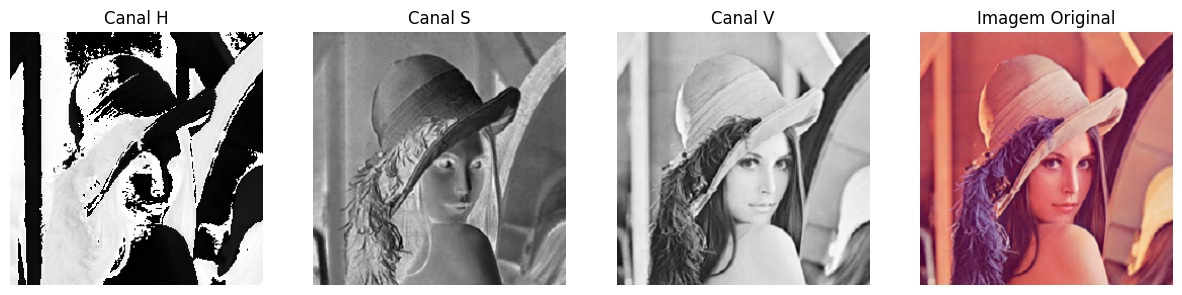

In [2]:
# Definindo o caminho para a imagem
img_path = os.path.join(PATH_DIR, "imagem", "lenna_250.png")

# Carregar imagem
image = cv2.imread(img_path)

# Converter BGR para RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converter RGB para HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Separar canais HSV
h, s, v = cv2.split(image_hsv)

# Exibir canais
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(h, cmap='gray')
ax[0].set_title('Canal H')
ax[0].axis('off')

ax[1].imshow(s, cmap='gray')
ax[1].set_title('Canal S')
ax[1].axis('off')

ax[2].imshow(v, cmap='gray')
ax[2].set_title('Canal V')
ax[2].axis('off')

ax[3].imshow(image_rgb)
ax[3].set_title('Imagem Original')
ax[3].axis('off')
    
plt.show()

**Continuação do problema 1.**

* Modifique apenas o canal Saturation (S) com +30% do seu valor e reconverter para RGB
* Exiba o resultado da imagem modificado com a imagem original. 

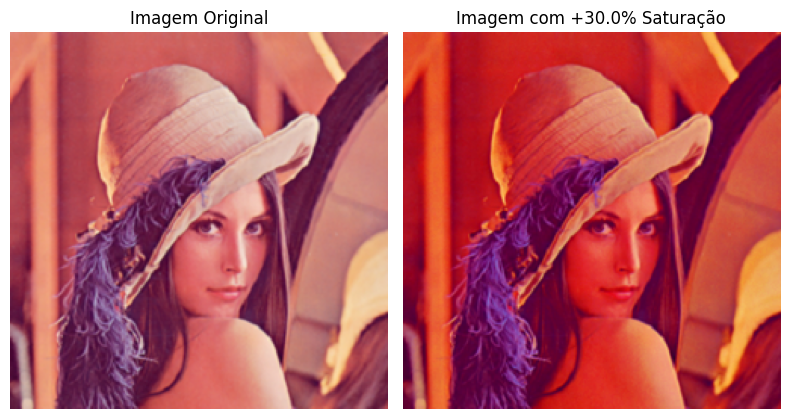

In [3]:
ptg_saturacao = 30.0
fator = (ptg_saturacao / 100.0) * 255.0

# Aumentar saturação
s = s.astype(np.float32)
s = s + fator
s = np.clip(s, 0, 255)
s = s.astype(np.uint8)

# Recombinar canais
image_hsv = cv2.merge((h, s, v))

# Converter de volta para RGB
image_rgb_modificada = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

# Exibir imagem com saturação aumentada
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].imshow(image_rgb)
ax[0].set_title('Imagem Original')
ax[0].axis('off')
ax[1].imshow(image_rgb_modificada)
ax[1].set_title('Imagem com +30.0% Saturação')
ax[1].axis('off')
plt.tight_layout()
plt.show()

### 2. Análise de Histogramas

**Tarefas:**

* Calcule o histograma do canal Hue (H) usando `cv2.calcHist()`.
* Plote o histograma usando matplotlib.
* Identifique picos no histograma (cores dominantes).
* Compare o histograma de Hue (HSV) com o histograma do canal Blue (RGB).

*Obs.: Utilize a imagem carregada do enunciado anterior (**lenna_250.png**)*

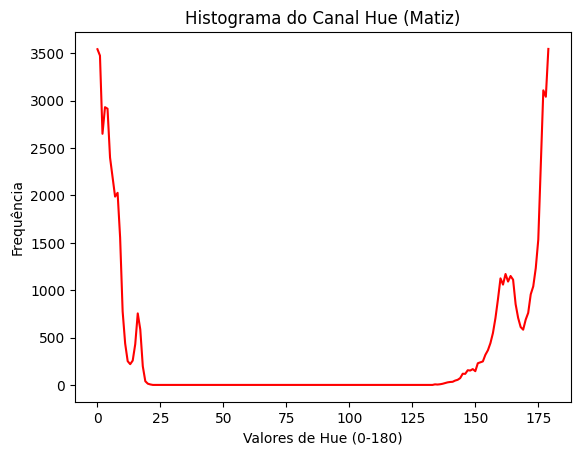

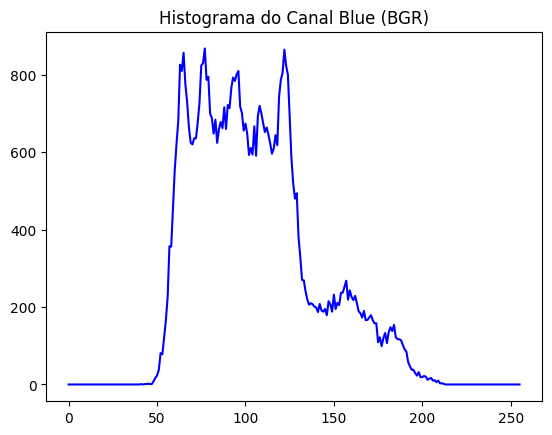

In [4]:
# Definindo o caminho para a imagem
img_path = os.path.join(PATH_DIR, "imagem", "lenna_250.png")

# Carregar imagem
image = cv2.imread(img_path)

# Converter BGR para RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converter RGB para HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Separar canais HSV
h, s, v = cv2.split(image_hsv)

# Calcular histograma do canal Hue
hist_hue = cv2.calcHist([h], [0], None, [180], [0, 180])

# Plotar histograma
plt.plot(hist_hue, color='r')  
plt.title("Histograma do Canal Hue (Matiz)")  
plt.xlabel("Valores de Hue (0-180)")  
plt.ylabel("Frequência")  
plt.show()  

# Histograma do canal Blue (RGB)
blue_channel = image_rgb[:, :, 2]
hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])  

plt.plot(hist_blue, color='b')  
plt.title("Histograma do Canal Blue (BGR)")  
plt.show()

### 3. Equalização de Histograma em Imagens Monocromáticas

**Objetivo:**

Praticar a manipulação de histogramas para melhorar o contraste em imagens em tons de cinza, compreendendo o impacto visual da equalização.

**Tarefas:**

* Carregue uma imagem (**lena_cinza.png**) em escala de cinza..
* Calcule e plote o histograma original usando `cv2.calcHist()` e matplotlib, respectivamente.
* Aplique equalização de histograma usando `cv2.equalizeHist()`.
* Plote o histograma equalizado e compare sua distribuição com o original.
* Exiba a imagem antes e depois da equalização.

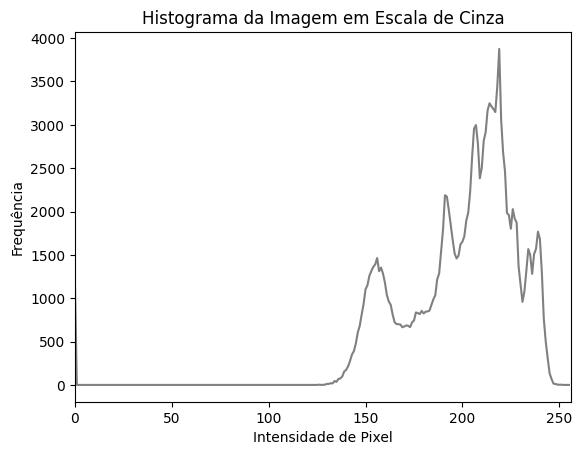

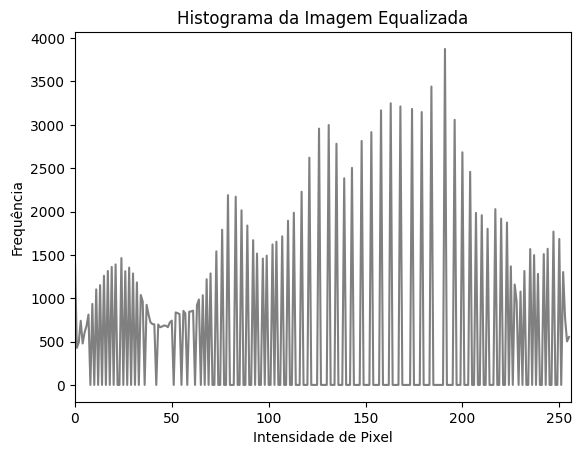

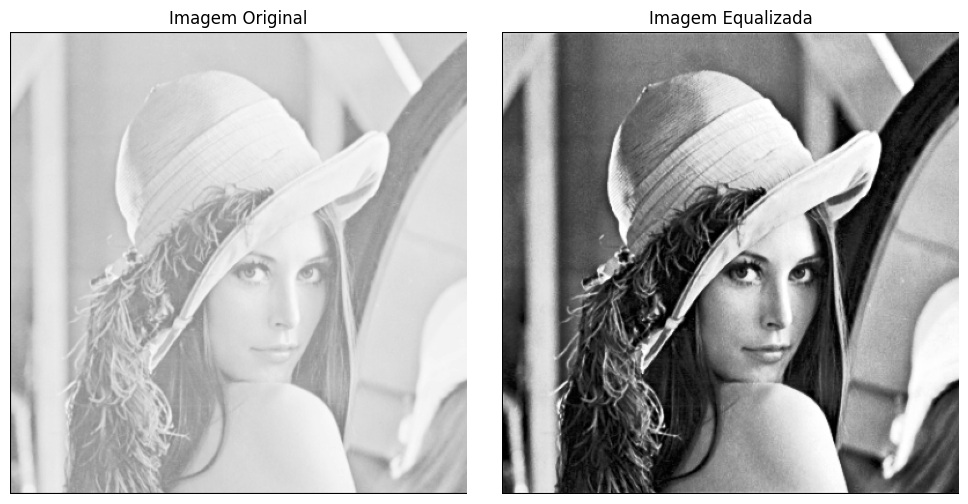

In [5]:
# Definindo o caminho para a imagem
img_path = os.path.join(PATH_DIR, "imagem", "lena_cinza.png")

# Carregar imagem em escala de cinza
img = cv2.imread(img_path, 0)

# Calcular histograma
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plotar histograma
plt.plot(hist, color='gray')
plt.title("Histograma da Imagem em Escala de Cinza")
plt.xlabel("Intensidade de Pixel")
plt.ylabel("Frequência")
plt.xlim([0, 256])
plt.show()

# Aplicando equalização de histograma
img_eq = cv2.equalizeHist(img)
# Calcular histograma da imagem equalizada
hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0, 256])
# Plotar histograma da imagem equalizada
plt.plot(hist_eq, color='gray')
plt.title("Histograma da Imagem Equalizada")
plt.xlabel("Intensidade de Pixel")
plt.ylabel("Frequência")
plt.xlim([0, 256])
plt.show()

# Exibir imagem original e equalizada
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Imagem Original')
ax[0].axis('off')
ax[1].imshow(img_eq, cmap='gray')
ax[1].set_title('Imagem Equalizada')
ax[1].axis('off')
plt.tight_layout()
plt.show()

### 4. Equalização de Histograma em Imagens Coloridas no Espaço HSV

**Objetivo**

Praticar a equalização de histograma em imagens coloridas preservando as informações de cor, através da manipulação do canal de intensidade (Value) no espaço HSV.

**Tarefas**

* Carregamento e Visualização Inicial
    * Carregue a imagem **lenna_250.png** usando OpenCV.
    * Converta a imagem BGR para RGB.
    * Exiba a imagem convertida RGB e seu histograma nos canais R, G e B.

* Conversão para Espaço HSV
    * Converta a imagem RGB para o espaço de cores HSV.    

* Equalização do Canal V (Value)
    * Equalize apenas o canal V (intensidade/luminância) usando cv2.equalizeHist().
    * Converta a imagem de volta para RGB após a equalização.

* Visualização dos Resultados
    * Exiba a imagem convertida RGB equalizada e seu respectivo histograma nos canais R, G e B.

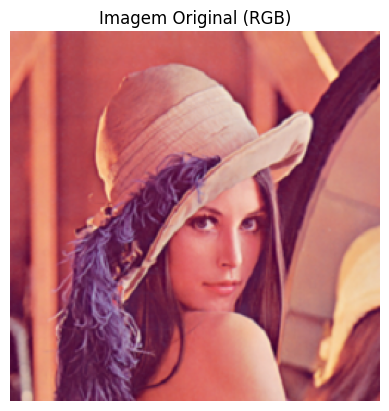

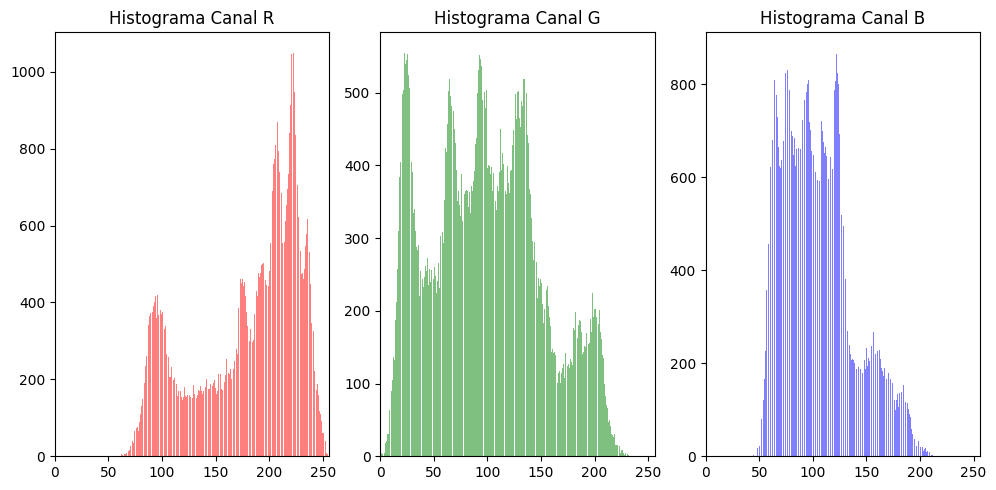

In [6]:
## Carregamento e Visualização Inicial ##

# Definindo o caminho para a imagem
img_path = os.path.join(PATH_DIR, "imagem", "lenna_250.png")

# Carregar imagem
image = cv2.imread(img_path)

# Converter para RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Sepera os canais RGB
r, g, b = cv2.split(image_rgb)

# Exibe a imagem convertida RGB e seu histograma nos canais R, G e B.
plt.imshow(image_rgb)
plt.title('Imagem Original (RGB)')
plt.axis('off')
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(r.ravel(), bins=256, color='red', alpha=0.5)
ax[0].set_title('Histograma Canal R')
ax[0].set_xlim([0, 256])
ax[1].hist(g.ravel(), bins=256, color='green', alpha=0.5)
ax[1].set_title('Histograma Canal G')
ax[1].set_xlim([0, 256])
ax[2].hist(b.ravel(), bins=256, color='blue', alpha=0.5)
ax[2].set_title('Histograma Canal B')
ax[2].set_xlim([0, 256])
plt.tight_layout()
plt.show()

In [7]:
## Conversão para Espaço HSV ##

# Converter RGB  para HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Separar canais HSV
h, s, v = cv2.split(image_hsv)

# Equalizar o canal V
v_eq = cv2.equalizeHist(v)

# Recombinar os canais H, S e V equalizado
image_hsv_eq = cv2.merge((h, s, v_eq))

# Converta a imagem de volta para RGB após a equalização.
image_rgb_eq = cv2.cvtColor(image_hsv_eq, cv2.COLOR_HSV2RGB)


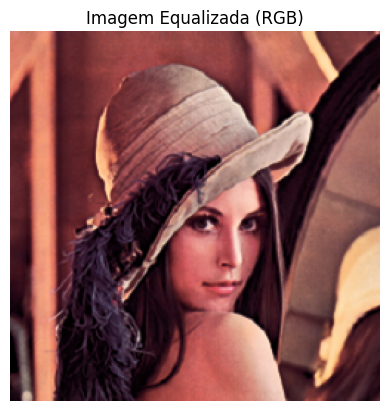

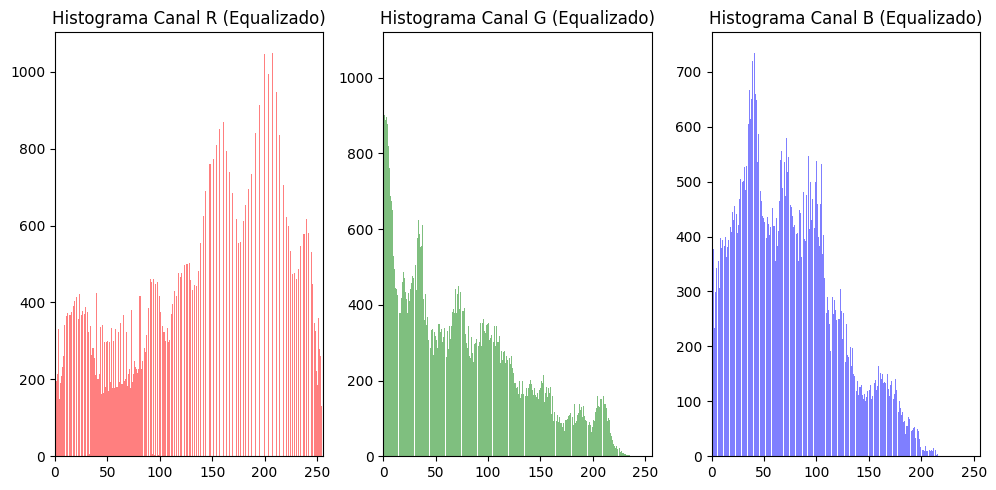

In [8]:
# Exibe a imagem convertida RGB 
plt.imshow(image_rgb_eq)
plt.title('Imagem Equalizada (RGB)')
plt.axis('off')
plt.show()

# Separa os canais RGB da imagem equalizada
r_eq, g_eq, b_eq = cv2.split(image_rgb_eq)

# Exibe o histograma nos canais R, G e B.
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(r_eq.ravel(), bins=256, color='red', alpha=0.5)
ax[0].set_title('Histograma Canal R (Equalizado)')
ax[0].set_xlim([0, 256])
ax[1].hist(g_eq.ravel(), bins=256, color='green', alpha=0.5)
ax[1].set_title('Histograma Canal G (Equalizado)')
ax[1].set_xlim([0, 256])
ax[2].hist(b_eq.ravel(), bins=256, color='blue', alpha=0.5)
ax[2].set_title('Histograma Canal B (Equalizado)')
ax[2].set_xlim([0, 256])
plt.tight_layout()
plt.show()